##  Please Vote If You Like ^__^ .


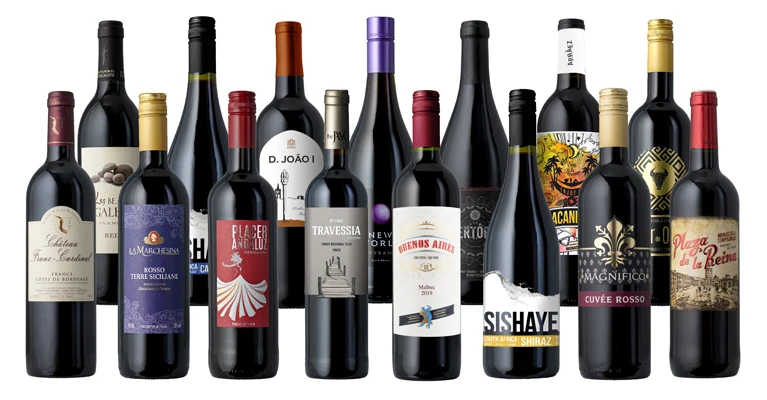

* [Load and Check Data](#1)<br><br>
* [EDA](#2)
* [Data Preperation](#3)
* [Classification](#4)
  * [KNN](#5)
  * [KNN GridSearch](#6)
  * [Random Forest](#7)
  * [Random Forest GridSearch](#8)
  * [SVC](#9)
  * [Extra Trees](#10)
  * [Gradient Boosting](#11)

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "
import seaborn as sns
import missingno as msno
from collections import Counter
import plotly.figure_factory as ff
from plotly import tools

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id='1'></a>
# Load and Check Data

In [ ]:
dataset=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [ ]:
dataset.info()

In [ ]:
dataset.hist(bins=25,figsize=(15,10))

In [ ]:
corr_matrix=dataset.corr()
print(corr_matrix['quality'])

In [ ]:

dataset['quality']=pd.cut(dataset['quality'],3,labels=['bad','medium','good'])
dataset

In [ ]:
dataset['quality'].value_counts()

<a id='2'></a>
# EDA

In [ ]:
def multivarient_plot(dataset,rows,cols,plot_type):
    column_names=dataset.columns
    number_col=len(column_names)
    fig,axx=plt.subplots(rows,cols,figsize=(22,16))
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                    sns.violinplot(x='quality',y=column_names[counter],data=dataset,ax=axx[i][j])    
            elif 'box' in plot_type:
                    sns.boxplot(x='quality',y=column_names[counter],data=dataset,ax=axx[i][j])
            elif 'point' in plot_type:
                   sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axx[i][j])
            elif 'bar' in plot_type:
                    sns.barplot(x='quality',y=column_names[counter],data=dataset,ax=axx[i][j])
            counter=counter+1 
            if counter==(number_col-1):
                break

In [ ]:
def plot_num(df,features):
    for c in features:
        sns.distplot(df[c],bins=20)
        plt.show()
        

In [ ]:
plot_num(dataset,['volatile acidity','citric acid','chlorides','sulphates','alcohol'])


In [ ]:
sns.barplot(x=dataset['quality'],y=dataset['alcohol'],palette='PRGn')
plt.show()

In [ ]:
sns.barplot(x=dataset['quality'],y=dataset['volatile acidity'],palette='RdBu')
plt.show()

In [ ]:
sns.barplot(x=dataset['quality'],y=dataset['citric acid'],palette='RdBu')
plt.show()

In [ ]:
multivarient_plot(dataset,4,3,'point')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['quality']=le.fit_transform(dataset['quality'])

In [ ]:

trace1=go.Scatter3d(x=dataset['volatile acidity'],
                    y=dataset['alcohol'],
                    z=dataset['citric acid'],
                    mode="markers",
                    marker=dict(
                        size=10,
                        color=dataset.quality
                        ))
data=[trace1]
layout=go.Layout(
          margin=dict(
              t=0,
              b=0,
              r=0,
              l=0
              
              )
    )    
fig=go.Figure(layout=layout,data=data)
iplot(fig)


<a id='3'></a>
# Data Preperation

In [ ]:
dataset['alcohol_cat']=np.ceil(dataset['alcohol']/2.5)
dataset['alcohol_cat'].where(dataset['alcohol_cat']<5,5.0,inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(dataset,dataset['alcohol_cat']):
    strat_train_set=dataset.loc[train_index]
    strat_test_set=dataset.loc[test_index]
for set in(strat_train_set,strat_test_set):
    set.drop(['alcohol_cat'],axis=1,inplace=True)

In [ ]:
strat_train_set

In [ ]:
strat_test_set

In [ ]:
y_train=strat_train_set['quality']
x_train=strat_train_set.drop(['quality'],axis=1)
y_test=strat_test_set['quality']
x_test=strat_test_set.drop(['quality'],axis=1)


<a id='5'></a>
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

<a id='6'></a>
# KNN GridSearch

In [ ]:
grid={'n_neighbors':np.arange(1,100),
       'p':np.arange(1,5),
       'weights':['uniform','distance']
      }
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)
print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

<a id='7'></a>
# Random Forest[](http://)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
accuracies=cross_val_score(rfc,x_train,y_train,cv=5)
rfc.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',rfc.score(x_test,y_test))

<a id='8'></a>
# Random Forest GridSearch

In [ ]:
grid = {'n_estimators':np.arange(10,1000,50),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

<a id='9'></a>
# Linear SVC

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing  import StandardScaler 
from sklearn.svm import LinearSVC
svm_clf=Pipeline((
   ('scaler',StandardScaler()),
   ('linear_svc',LinearSVC(C=1,loss='hinge')), 
))
accuracies=cross_val_score(svm_clf,x_train,y_train,cv=5)
svm_clf.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',svm_clf.score(x_test,y_test))

<a id='10'></a>
# Extra Trees

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier 
rfc= ExtraTreesClassifier(random_state=42)
accuracies=cross_val_score(rfc,x_train,y_train,cv=5)
rfc.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',rfc.score(x_test,y_test))


<a id=11></a>
# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
accuracies=cross_val_score(gbc,x_train,y_train,cv=5)
gbc.fit(x_train,y_train)
print('Train Score: ',np.mean(accuracies))
print('Test Score: ',gbc.score(x_test,y_test))